In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# クラスタリングのための人工データセット
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

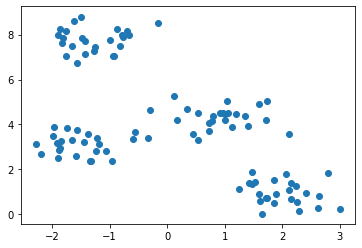

In [3]:
plt.scatter(X[:,0], X[:,1])

１、　適当な重心の作成（図から4つ）
２、各点を重心との距離を計算しもっとも近い重心のクラスに分類
３、分類されたクラスないで平均の値に重心を移動
４、その重心を使って再度２の作業と３の作業を繰り返す
５、重心が動かなくなった場合に作業中断または繰り返し回数行う
６、動かなくなった重心を保管

# 【問題1】中心点の初期値を決める
入力されたデータから K個の中心点 μ1から μKの初期値を決めるコードを作成してください。Kは指定したクラスタ数です。最もシンプルな初期値の決定方法は、データ点 Xnの中からランダムに K個選ぶことです。今回はこれを実装してください。



In [4]:
center_X = X[np.random.choice(X.shape[0],4), :]
center_X

array([[-1.57006498,  6.72375844],
       [-1.6609057 ,  3.31911046],
       [-2.18485772,  2.68708996],
       [-2.18485772,  2.68708996]])

# 【問題3】クラスタへの割り当て

In [5]:
#Xのサンプル数だけ空のラベルを作る
idx = np.zeros(X.shape[0])
#距離の二乗が一番近い中心点のインデックスを返す。
for i in range(X.shape[0]):
    idx[i] = np.argmin(np.sum((X[i,:] - center_X)**2,axis=1)) # np.argminで最小のもの探し

# 【問題2】SSEを求める関数の作成
クラスタ内誤差平方和（SSE, Sum of Squared Errors）を計算する関数を作成してください。K-meansはこのSSEを最小化する rnkと μkを求めることが目的となります。複数個の初期値で計算したクラスタリング結果から、どれを最終的に採用するかを決める際にこのSSEを求める関数を使用します。

In [6]:
def _sse(X, center):
    """
    SSEを求める計算
    ＝＝＝＝＝＝＝＝＝
    score: 全てのクラスタの重心との残差の２乗の合計記録
    X：クラスタリングされたデータ
    center: 重心
    """
    score = 0
    
    #各所属しているクラスタの計算
    for k in range(center_X.shape[0]):
        score += np.sum((X[idx==k] - center_X[k])**2)
    return score

In [7]:
_sse(X, center_X)

738.8598405400521

# 【問題4】中心点の移動
中心点 μkを k 番目のクラスタに割り当てられる全てのデータ点 Xnの平均値（重心）に移動するコードを作成してください。

In [8]:
# クラス分けされたデータの中から重心更新（平均値で割り出す）
for k in range(center_X.shape[0]):
    center_X[k,:] = X[idx==k, :].mean(axis=0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [9]:
center_X

array([[-1.02817309,  7.48011186],
       [ 0.72592522,  2.75196002],
       [-1.40999534,  2.38515472],
       [        nan,         nan]])

# 【問題5】繰り返し

In [10]:
center_record = np.array([])
np.append(center_record, [1,2])

array([1., 2.])

In [11]:
max_iter = 10
pre_center  = X[np.random.choice(X.shape[0],4), :]
tol = 0.
for i in range(max_iter):
    #Xのサンプル数だけ空のラベルを作る
    idx = np.zeros(X.shape[0])
    
    #距離の二乗が一番近い中心点のインデックスを返す。
    for n in range(X.shape[0]):
        idx[n] = np.argmin(np.sum((X[n,:] - center_X)**2,axis=1)) # np.argminで最小のもの探し
    
    # クラス分けされたデータの中から重心更新（平均値で割り出す）
    for k in range(center_X.shape[0]):
        center_X[k] = X[idx==k].mean(axis=0)
        

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice.
  


# 【問題6】異なる初期値で計算
問題5の繰り返しを、指定した回数初期値を変更して計算するコードを作成してください。回数は雛形では引数n_initで指定します。


複数計算した中でSSEが最小になったものが最終的な学習結果となるため、その時の中心点 μk を保持しておきます。

In [13]:
SSE_score = 1000
n_int = 100
center_X = X[np.random.choice(X.shape[0], 4, replace=False), :]
for i in range(n_int):    
    #Xのサンプル数だけ空のラベルを作る
    idx = np.zeros(X.shape[0])
    #距離の二乗が一番近い中心点のインデックスを返す。
    for n in range(X.shape[0]):
        idx[n] = np.argmin(np.sum((X[n,:] - center_X)**2,axis=1)) # np.argminで最小のもの探し
    # クラス分けされたデータの中から重心更新（平均値で割り出す）
    for k in range(center_X.shape[0]):
        center_X[k] = X[idx==k].mean(axis=0)
    
    SSE_s = _sse(X, center_X)
    if SSE_s < SSE_score:
        SSE_score = SSE_s
        center = center_X
        print(SSE_s)

200.4131729932082
52.291239012385
48.63378320706402


# 【問題7】推定
新たなデータに対してどのクラスタに所属するかの推定の際は、学習時の1つ目のフェーズと同じことを行います。

In [14]:
def predict(self, X):
    """
    入力されたデータがどのクラスタに属するかを計算
    -------------------------------------------------------
    center:更新完了した重心
    """
    #Xのサンプル数だけ空のラベルを作る
    idx = np.zeros(X.shape[0])
    #距離の二乗が一番近い中心点のインデックスを返す。
    for n in range(X.shape[0]):
        idx[n] = np.argmin(np.sum((X[n,:] - self.center)**2,axis=1)) # np.argminで最小のもの探し

    return idx

# 最終的なクラス

In [15]:
class ScratchKMeans():
    """
    K-meansのスクラッチ実装

    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, n_clusters=4, n_init=10, max_iter=10, tol=3, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        """
        #SSEの記録
        self.sse_history = [5000]
        
        for i in range(self.n_init):
            # 重心の初期値ランダム取得
            self.center = X[np.random.choice(X.shape[0], self.n_clusters), :]
            self.pre_center = X[np.random.choice(X.shape[0], self.n_clusters), :]
            # クラスタリング用のインデックス保管庫
            self.idx = np.zeros(X.shape[0])
            
            for s in range(self.max_iter):
                #距離の二乗が一番近い中心点のインデックスを返す。
                for n in range(X.shape[0]):
                    distance = np.sum((self.center - X[n])**2, axis=1)
                    self.idx[n] = np.argmin(distance) # np.argminで最小のもの探し
               
                # クラス分けされたデータの中から重心更新（平均値で割り出す）
                for k in range(self.center.shape[0]):
                    self.pre_center[k] = X[idx==k].mean(axis=0)
                
                 # SSEの値求める
                SSE_s = self._sse(X)
                self.sse_history.append(SSE_s)
                if self.sse_history[-1] > SSE_s:
                    self.sse_history = SSE_s
                    self.center = self.center
        
                #もしも重心変更無ければ終了
                if np.sum(self.pre_center == self.center) == tol:
                    break
                self.center =  self.pre_center

    def _sse(self,X):
        """
        SSEを求める計算
        ＝＝＝＝＝＝＝＝＝
        score: 全てのクラスタの重心との残差の２乗の合計記録
        X：クラスタリングされたデータ
        self.center: 重心
        """
        score = 0
        #各所属しているクラスタの計算
        for k in range(self.center.shape[0]):
            score += np.sum((X[self.idx==k] - self.center[k])**2)
        return score
    
    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        """
        #Xのサンプル数だけ空のラベルを作る
        idx = np.zeros(X.shape[0])
        #距離の二乗が一番近い中心点のインデックスを返す。
        for n in range(X.shape[0]):
            idx[n] = np.argmin(np.sum((X[n,:] - self.center)**2,axis=1)) # np.argminで最小のもの探し
        
        return idx

In [16]:
X.shape[0]

100

In [17]:
skm = ScratchKMeans(n_clusters=4, n_init=10, max_iter=100, verbose=True)

In [18]:
skm.fit(X)

In [19]:
X[skm.idx==0][:,0]

array([2.99684287, 1.46870582, 2.62496786, 2.28809874, 2.79939362,
       2.64465731, 1.7190373 , 2.14398059, 2.06051753, 1.85367905,
       1.61986895, 1.89949126, 2.4198128 , 2.23345072, 1.51989121,
       2.11872357, 1.42002502, 2.15940501, 1.4726926 , 2.25643834,
       1.24016835, 1.64869438, 1.73810647, 1.60161834, 1.84845803])

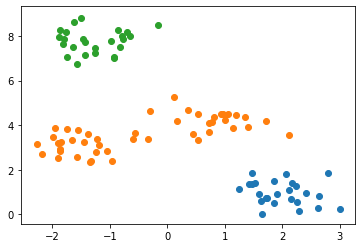

In [20]:
plt.scatter(X[skm.idx==0][:,0], X[skm.idx==0][:,1])
plt.scatter(X[skm.idx==1][:,0], X[skm.idx==1][:,1])
plt.scatter(X[skm.idx==2][:,0], X[skm.idx==2][:,1])
plt.show();

In [21]:
skm.predict(X)

array([1., 2., 1., 1., 3., 1., 1., 2., 1., 2., 2., 2., 2., 2., 2., 0., 0.,
       1., 1., 0., 1., 2., 1., 0., 1., 1., 1., 1., 0., 0., 0., 2., 0., 0.,
       1., 1., 2., 0., 2., 1., 3., 1., 2., 1., 1., 2., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 2., 2., 0., 0., 2., 2., 0., 0., 3., 0., 2., 1., 1.,
       0., 1., 2., 0., 1., 2., 1., 1., 1., 1., 0., 0., 0., 2., 1., 1., 0.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1.])

# 【問題8】エルボー法の実装
K-meansにおいて中心点の個数 k は人為的に決める必要がありますが、その判断方法としてエルボー法があります。エルボー法により中心点の個数 
k を検討するためのコードを作成してください。<br>
SSEを縦軸、クラスタ数 k を横軸にした折れ線グラフを表示します。このためにK-meansのインスタンスからはSSEを取得できるようにしてください。

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: Mean of empty slice.


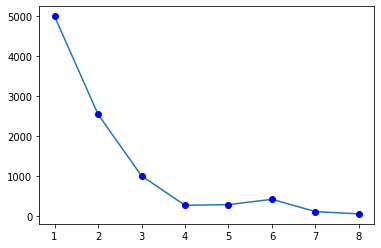

In [22]:
K = 8
sse_reco = np.zeros(K)
for k in range(K):
    skm = ScratchKMeans(n_clusters=k+1, n_init=10, max_iter=100)
    skm.fit(X)
    sse_reco[k] = skm.sse_history[k]

plt.plot(np.arange(1,9),sse_reco)
plt.plot(np.arange(1,9),sse_reco,"bo")
plt.show();

# 【問題9】（アドバンス課題）シルエット図
あとで余裕があれば挑戦

# 卸売業者のデータ分析
クラスタリングを利用法を学ぶために、Wholesale customers Data Setを使用します。

UCI Machine Learning Repository: Wholesale customers Data Set

Data Folderの中からWholesale customers data.csvをダウンロードしてください。これはポルトガルのリスボンにある卸売業者（wholesale）が顧客から集めたデータです。中身は各顧客が年間でミルクや食料品を何ユーロ購入しているかというデータになっています。顧客は小売店やレストランです。RegionとChannelは取り覗き、金額のデータでK-meansを利用します。

In [23]:
df = pd.read_csv('Wholesale customers data.csv')
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [24]:
data = df.iloc[:, 2:]

In [25]:
data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


# 次元削減
金額に関する特徴量は6個ありますが、可視化するために次元削減を行います。これに関してはscikit-learnによるPCAのサンプルコードを用意したので利用してください。

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca = pca.fit(data)
data_pca = pca.transform(data)

[0.45961362 0.86478588 0.93481597 0.97883941 0.99386152 1.        ]


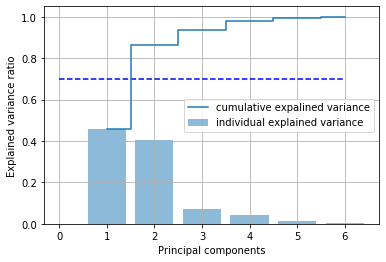

In [27]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=None)
pca = pca.fit(data)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

# 【問題10】クラスタ数kの選択
最適だと思われるクラスタ数 
k
 を選択してください。エルボー法やシルエット図を活用する他、人間が後々どう利用したいのかも選択に関わってきます。選択した上で、なぜそれを選んだか説明してください。

(440, 2)

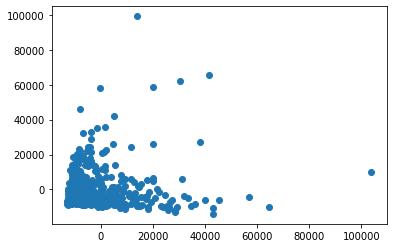

In [49]:
plt.scatter(data_pca[:,0], data_pca[:,1])
data_pca.shape

### 自作のKmeans

In [51]:
skm = ScratchKMeans(n_clusters=5)
skm.fit(data_pca)

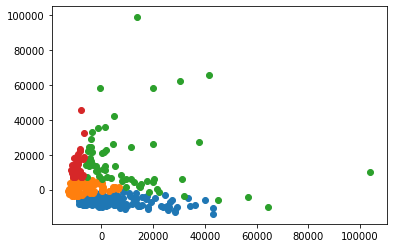

In [52]:
idx =  skm.predict(data_pca)
for i in range(6):
    plt.scatter(data_pca[idx==i+1][:,0], data_pca[idx==i+1][:,1])
plt.show();

 ### sklearn使う

In [29]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)
km.fit(data_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [30]:
idx = km.predict(data_pca)

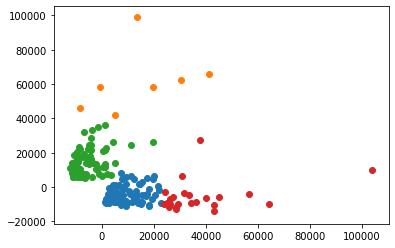

In [31]:
for i in range(6):
    plt.scatter(data_pca[idx==i+1][:,0], data_pca[idx==i+1][:,1])
plt.show();

In [32]:
print ('Distortion: %.2f'% km.inertia_)

Distortion: 32043789013.52


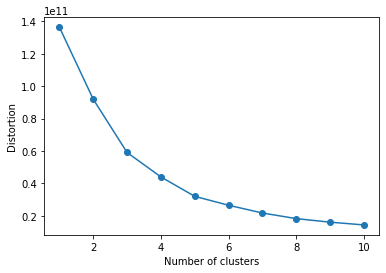

In [33]:
# エルボー法での描写
distortions = []

for i  in range(1,11):                # 1~10クラスタまで一気に計算 
    km = KMeans(n_clusters=i,
                init='k-means++',     # k-means++法によりクラスタ中心を選択
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(data_pca)                         # クラスタリングの計算を実行
    distortions.append(km.inertia_)   # km.fitするとkm.inertia_が得られる

plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show();

### エルボー法でのクラスタ数の評価 
エルボー法での描写において、SEEの値がクラスタの数を多くすることによって下がっている事がわかる、１０個のうち線の折れ方を見ると滑らかに曲がっているが３〜５付近で曲がり方が大きいように見える。そのため、最適なクラスタの数は３〜５の中が最適だと

# 【問題11】既知のグループとの比較
RegionとChannelはK-meansに使用しなかったが、これれらは既知のグループです。クラスタとこれら既知のグループがどう違うかを確認し、説明してください。まずはそれぞれを可視化してください。

全問題の結果から３〜５にクラスタリングしてRegionとChannelを使ったラベル別プロット図を比較。

In [34]:
df_array = df.values
Channel = df_array[:, 0]
Region = df_array[:, 1]

In [35]:
# Region 1,2,3のラベルが入ったデータ
data_region = np.insert(data_pca, 2 , Region, axis=1)
# Channel1,2のラベルが入ったデータ
data_Channel = np.insert(data_pca, 2 , Channel, axis=1)

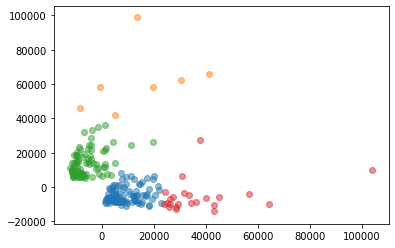

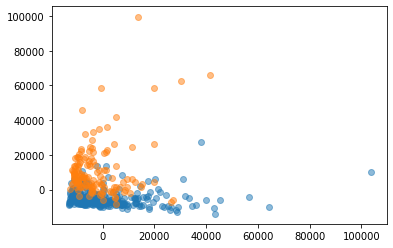

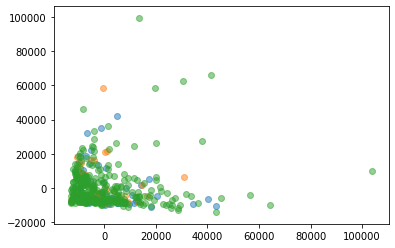

In [36]:
for i in range(6):
    plt.scatter(data_pca[idx==i+1][:,0], data_pca[idx==i+1][:,1], alpha=0.5)
plt.show();

for i in range(2):
    plt.scatter(data_Channel[data_Channel[:, 2]==i+1][:,0], data_Channel[data_Channel[:, 2]==i+1][:,1], alpha=0.5)
plt.show();

for i in range(3):
    plt.scatter(data_region[data_region[:, 2]==i+1][:,0], data_region[data_region[:, 2]==i+1][:,1], alpha=0.5)
plt.show();

次元削減した特徴量のデータでは、Region、Channelラベルはクラスタリングできるものではなかった。
そのため、次元削減しないで特定の特徴量によってラベルデータが意味を持っている可能性がある。

# 【問題12】卸売業者にとって有益な情報
卸売業者にとって有益な情報を探し出し文章にまとめてください。<br>
《ヒント》<br>
前処理を行う前のデータを使い、各クラスタの要約統計量を見るなどしてみましょう。また、PCAで次元削減したデータに対してK-meansを使用しましたが、6個の特徴量をそのまま使ったり、一部の特徴量のみを使ったりということも試してみてください。既知のグループとの比較結果も参考にしてください。
条件ごとにデータを見る際にはPandasのgroupbyが便利です。

In [37]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [38]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [39]:
df.isnull().count()

Channel             440
Region              440
Fresh               440
Milk                440
Grocery             440
Frozen              440
Detergents_Paper    440
Delicassen          440
dtype: int64

In [40]:
df_corr = df.corr()
display(df_corr)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


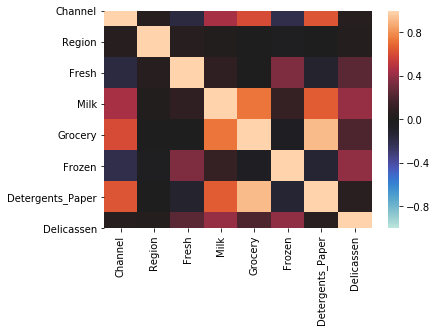

In [41]:
import seaborn as sns
sns.heatmap(df_corr, vmax=1, vmin=-1, center=0)

In [42]:
df.loc[:, ['Channel', 'Grocery', 'Detergents_Paper']]

,Channel,Grocery,Detergents_Paper
0,2,7561,2674
1,2,9568,3293
2,2,7684,3516
3,1,4221,507
4,2,7198,1777
...,...,...,...
435,1,16027,182
436,1,764,93
437,2,30243,14841
438,1,2232,168


In [43]:
new_data = df.loc[:, ['Channel', 'Grocery', 'Detergents_Paper']].values

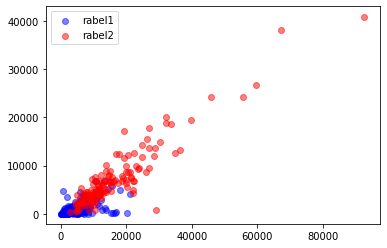

In [44]:
plt.scatter(new_data[new_data[:, 0]==1][:,1], new_data[new_data[:, 0]==1][:,2],c='b', alpha=0.5, label='rabel1')
plt.scatter(new_data[new_data[:, 0]==2][:,1], new_data[new_data[:, 0]==2][:,2],c='r',  alpha=0.5, label='rabel2')
plt.legend()
plt.show();

このグラフはChannelラベル（顧客の属性：「ホテル・レストラン」「小売」でラベリング）と 'Grocery'・'Detergents_Paper'の売り上げデータを可視化したもの。グラフからはChannelラベル１は売り上げの散布広がっていなく値も小さい。一方でラベル２のデータは大きく散布していてラベル１よりも値が大きい。
Channelラベルは顧客の規模を示しているので、売り上げに関わってくるところが多いが、特に食料と洗剤と紙の消費がレストランやホテルで多い事がこの結果を見てわかる。またラベル２の顧客については比例して増える傾向になっていて、線形回帰を使った予想も可能かもしれない。そのほかの製品についてもこの傾向があるようであれば、顧客のホテル、レストランの規模などで供給量の予測することも可能かもしれない。

# 【問題13】（アドバンス課題）他の手法の調査
今回扱ったK-means以外に非階層クラスタリングで有名な手法としては DBSCAN 、
PCA以外に次元削減手法で有名な手法としては t-SNE や LLE があります。
DBSCANのメリット・デメリット
t-SNE、LLEのメリット・デメリット
について記述してください。

### DBSCANについて<br>
半径以内に点がいくつあるかでその領域をクラスタとして判断するアルゴリズム。近傍の閾値を超えている限り、クラスタを成長させ続ける。半径以内にない点はノイズとする。<br>

<strong>メリット</strong>：<br>
最初にクラスタ数を決めなくてもクラスタ作成ができる。<br>
クラスタが球状でなくても良い。尖ったクラスタでも分類できる。

<strong>デメリット</strong>：<br>
分類する概念が微妙。データによってどのクラスタに属するか変わる可能性あり。
データがわからないとパラメータを決める事が難しい。


Dataset1:
Number of Noise Points: 16 (1000)
Dataset2:
Number of Noise Points: 0 (1000)


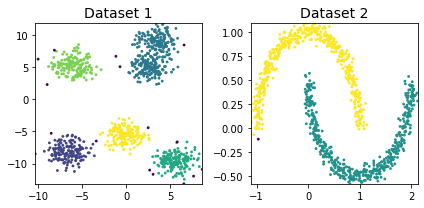

In [45]:
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
# 塊のデータセット
dataset1 = datasets.make_blobs(n_samples=1000, random_state=10, centers=6, cluster_std=1.2)[0]
 
# 月のデータセット
dataset2 = datasets.make_moons(n_samples=1000, noise=.05)[0]
 
# グラフ作成
def cluster_plots(set1, set2, colours1 = 'gray', colours2 = 'gray', title1 = 'Dataset 1', title2 = 'Dataset 2'):

    fig,(ax1,ax2) = plt.subplots(1, 2)
    fig.set_size_inches(6, 3)

    ax1.set_title(title1,fontsize=14)
    ax1.set_xlim(min(set1[:,0]), max(set1[:,0]))
    ax1.set_ylim(min(set1[:,1]), max(set1[:,1]))
    ax1.scatter(set1[:, 0], set1[:, 1],s=8,lw=0,c= colours1)

    ax2.set_title(title2,fontsize=14)
    ax2.set_xlim(min(set2[:,0]), max(set2[:,0]))
    ax2.set_ylim(min(set2[:,1]), max(set2[:,1]))
    ax2.scatter(set2[:, 0], set2[:, 1],s=8,lw=0,c=colours2)

    fig.tight_layout()
    plt.show()

# DBSCANクラスタリングを作成

dbscan_dataset1 = cluster.DBSCAN(eps=1, min_samples=5, metric='euclidean').fit_predict(dataset1)
dbscan_dataset2 = cluster.DBSCAN(eps=1, min_samples=5, metric='euclidean').fit_predict(dataset2)
 
# noise points are assigned -1
print('Dataset1:')
print("Number of Noise Points: ",sum(dbscan_dataset1==-1)," (",len(dbscan_dataset1),")",sep='')
print('Dataset2:')
print("Number of Noise Points: ",sum(dbscan_dataset2==-1)," (",len(dbscan_dataset2),")",sep='')
dbscan_dataset2 = cluster.DBSCAN(eps=0.1, min_samples=5, metric='euclidean').fit_predict(dataset2)
cluster_plots(dataset1, dataset2, dbscan_dataset1, dbscan_dataset2)

In [46]:
km = KMeans()
km.fit(dataset2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### PCAについて<br>
元の情報を出来るだけ失わないようにコアな成分を抽出する次元削減法。<br>
データが多次元正規分布に従うことを仮定している<br>
- デメリット：<br>
高次元空間上で非線形構造を持っているデータに対しては適切な低次元表現が得られない。<br>
「類似するものを近くに配置する」ことよりも「類似しないものを遠くに配置する」ことを優先するようアルゴリズムが働く


### t-SNEについて
次元削減の問題を確率分布に基づくアプローチで解くもの
- メリット:<br>
数百または数千次元のデータですら無理やり2次元の「マップ」に落とし込む能力を備えている<br>
- デメリット:<br>
うまくいくことが保証されているのは2or3次元への圧縮のみ<br>
局所構造が次元の呪いの影響を受けやすい<br>
最適化アルゴリズムの収束性が保証されていない<br>

### LLE について
多様体学習と呼ばれる手法の一つ。非線形な構造を持ったデータに対して次元削減を行う事ができる。
 - メリット：<br>
 非線形なデータに対する次元削減ができる。<br>
 - デメリット：<br>
 近傍点のパラメータを決めるときには注意が必要。